### Chickago police dataset(from begining of 2021 year to nowadays) is taken from database

#### MAIN Task: give valuable advices to police and try to make some predictions

In [1]:
# import necessary libraries

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [2]:
# read data

data = pd.read_csv('CrimesAllData.csv',sep=";")

### Do some surface analysis

In [3]:
data.head()

,ID,CaseNumber,Date,Block,IUCR,PrimaryType,Description,LocationDescription,Arrest,Domestic,...,Ward,CommunityArea,FBICode,XCordinate,YCordinate,Year,UpdatedOn,Latitude,Longitude,Location
0,12260346,JE102126,01/03/2021 01:23:00 PM,070XX S EGGLESTON AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,6,68,08B,1174496,1858251,2021,01/16/2021 03:49:23 PM,41.766435,-87.635964,"(41.766435144, -87.635963997)"
1,12263464,JE105797,01/03/2021 06:59:00 AM,080XX S YALE AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,False,...,17,44,06,1176011,1851718,2021,01/16/2021 03:49:23 PM,41.748474,-87.630607,"(41.748473982, -87.630606588)"
2,12259990,JE101773,01/03/2021 12:20:00 AM,056XX W WASHINGTON BLVD,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,29,25,08B,1138722,1900183,2021,01/16/2021 03:49:23 PM,41.882224,-87.766076,"(41.88222427, -87.766076162)"
3,12260669,JE102509,01/03/2021 08:47:00 PM,057XX S RACINE AVE,2022,NARCOTICS,POSSESS - COCAINE,STREET,True,False,...,16,67,18,1169298,1866822,2021,01/16/2021 03:49:23 PM,41.790069,-87.654769,"(41.79006908, -87.654768679)"
4,25702,JE102438,01/03/2021 08:09:00 PM,068XX S STONY ISLAND AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,5,43,01A,1188038,1860051,2021,01/10/2021 03:51:53 PM,41.771062,-87.586271,"(41.771062488, -87.586270811)"


In [4]:
data.dropna()

,ID,CaseNumber,Date,Block,IUCR,PrimaryType,Description,LocationDescription,Arrest,Domestic,...,Ward,CommunityArea,FBICode,XCordinate,YCordinate,Year,UpdatedOn,Latitude,Longitude,Location
0,12260346,JE102126,01/03/2021 01:23:00 PM,070XX S EGGLESTON AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,6,68,08B,1174496,1858251,2021,01/16/2021 03:49:23 PM,41.766435,-87.635964,"(41.766435144, -87.635963997)"
1,12263464,JE105797,01/03/2021 06:59:00 AM,080XX S YALE AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,False,...,17,44,06,1176011,1851718,2021,01/16/2021 03:49:23 PM,41.748474,-87.630607,"(41.748473982, -87.630606588)"
2,12259990,JE101773,01/03/2021 12:20:00 AM,056XX W WASHINGTON BLVD,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,29,25,08B,1138722,1900183,2021,01/16/2021 03:49:23 PM,41.882224,-87.766076,"(41.88222427, -87.766076162)"
3,12260669,JE102509,01/03/2021 08:47:00 PM,057XX S RACINE AVE,2022,NARCOTICS,POSSESS - COCAINE,STREET,True,False,...,16,67,18,1169298,1866822,2021,01/16/2021 03:49:23 PM,41.790069,-87.654769,"(41.79006908, -87.654768679)"
4,25702,JE102438,01/03/2021 08:09:00 PM,068XX S STONY ISLAND AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,5,43,01A,1188038,1860051,2021,01/10/2021 03:51:53 PM,41.771062,-87.586271,"(41.771062488, -87.586270811)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319874,12764386,JF321546,07/16/2022 09:00:00 AM,076XX S ABERDEEN ST,0620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE - GARAGE,False,False,...,17,71,05,1170307,1854138,2022,07/23/2022 04:48:36 PM,41.755241,-87.651438,"(41.755240718, -87.651437718)"
319875,12763829,JF320169,07/16/2022 09:50:00 PM,056XX N CENTRAL AVE,0820,THEFT,$500 AND UNDER,APARTMENT,False,False,...,45,11,06,1137865,1937134,2022,07/23/2022 04:48:36 PM,41.983637,-87.768329,"(41.983637269, -87.768328938)"
319876,12763309,JF320225,07/16/2022 11:46:00 PM,087XX S MICHIGAN AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,9,44,07,1178680,1847006,2022,07/23/2022 04:48:36 PM,41.735483,-87.620969,"(41.735483458, -87.620969434)"
319877,12763061,JF320017,07/16/2022 05:44:00 PM,129XX S EGGLESTON AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,9,53,08A,1175664,1819133,2022,07/23/2022 04:48:36 PM,41.659064,-87.632849,"(41.659063801, -87.632849323)"


In [5]:
data.isna().value_counts()

ID     CaseNumber  Date   Block  IUCR   PrimaryType  Description  LocationDescription  Arrest  Domestic  Beat   District  Ward   CommunityArea  FBICode  XCordinate  YCordinate  Year   UpdatedOn  Latitude  Longitude  Location
False  False       False  False  False  False        False        False                False   False     False  False     False  False          False    False       False       False  False      False     False      False       318993
                                                                  True                 False   False     False  False     False  False          False    False       False       False  False      False     False      False          886
dtype: int64

In [6]:
# drop reduntant columns for further analysis

data = data.drop(['CaseNumber','Block','IUCR','Description','Ward','CommunityArea','FBICode','XCordinate','YCordinate','UpdatedOn'], axis=1)

In [7]:
data.head()

,ID,Date,PrimaryType,LocationDescription,Arrest,Domestic,Beat,District,Year,Latitude,Longitude,Location
0,12260346,01/03/2021 01:23:00 PM,BATTERY,APARTMENT,False,True,732,7,2021,41.766435,-87.635964,"(41.766435144, -87.635963997)"
1,12263464,01/03/2021 06:59:00 AM,THEFT,RESIDENCE,False,False,623,6,2021,41.748474,-87.630607,"(41.748473982, -87.630606588)"
2,12259990,01/03/2021 12:20:00 AM,BATTERY,APARTMENT,False,True,1513,15,2021,41.882224,-87.766076,"(41.88222427, -87.766076162)"
3,12260669,01/03/2021 08:47:00 PM,NARCOTICS,STREET,True,False,713,7,2021,41.790069,-87.654769,"(41.79006908, -87.654768679)"
4,25702,01/03/2021 08:09:00 PM,HOMICIDE,STREET,False,False,332,3,2021,41.771062,-87.586271,"(41.771062488, -87.586270811)"


In [8]:
data.shape

(319879, 12)

In [9]:
type(data)

pandas.core.frame.DataFrame

In [10]:
type(data.ID)

pandas.core.series.Series

In [11]:
data.Arrest.dtype

dtype('bool')

In [12]:
data.Date.dtype

dtype('O')

### Do some group by functions to visualize data

In [14]:
# Group data by type of the crime

dataGroupedByType = data.groupby(['PrimaryType']).count()
dataGroupedByType.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,Year,Latitude,Longitude,Location
PrimaryType,,,,,,,,,,,
ARSON,736,736,736,736,736,736,736,736,736,736,736
ASSAULT,31203,31203,31203,31203,31203,31203,31203,31203,31203,31203,31203
BATTERY,62439,62439,62439,62439,62439,62439,62439,62439,62439,62439,62439
BURGLARY,10487,10487,10487,10487,10487,10487,10487,10487,10487,10487,10487
CONCEALED CARRY LICENSE VIOLATION,271,271,271,271,271,271,271,271,271,271,271


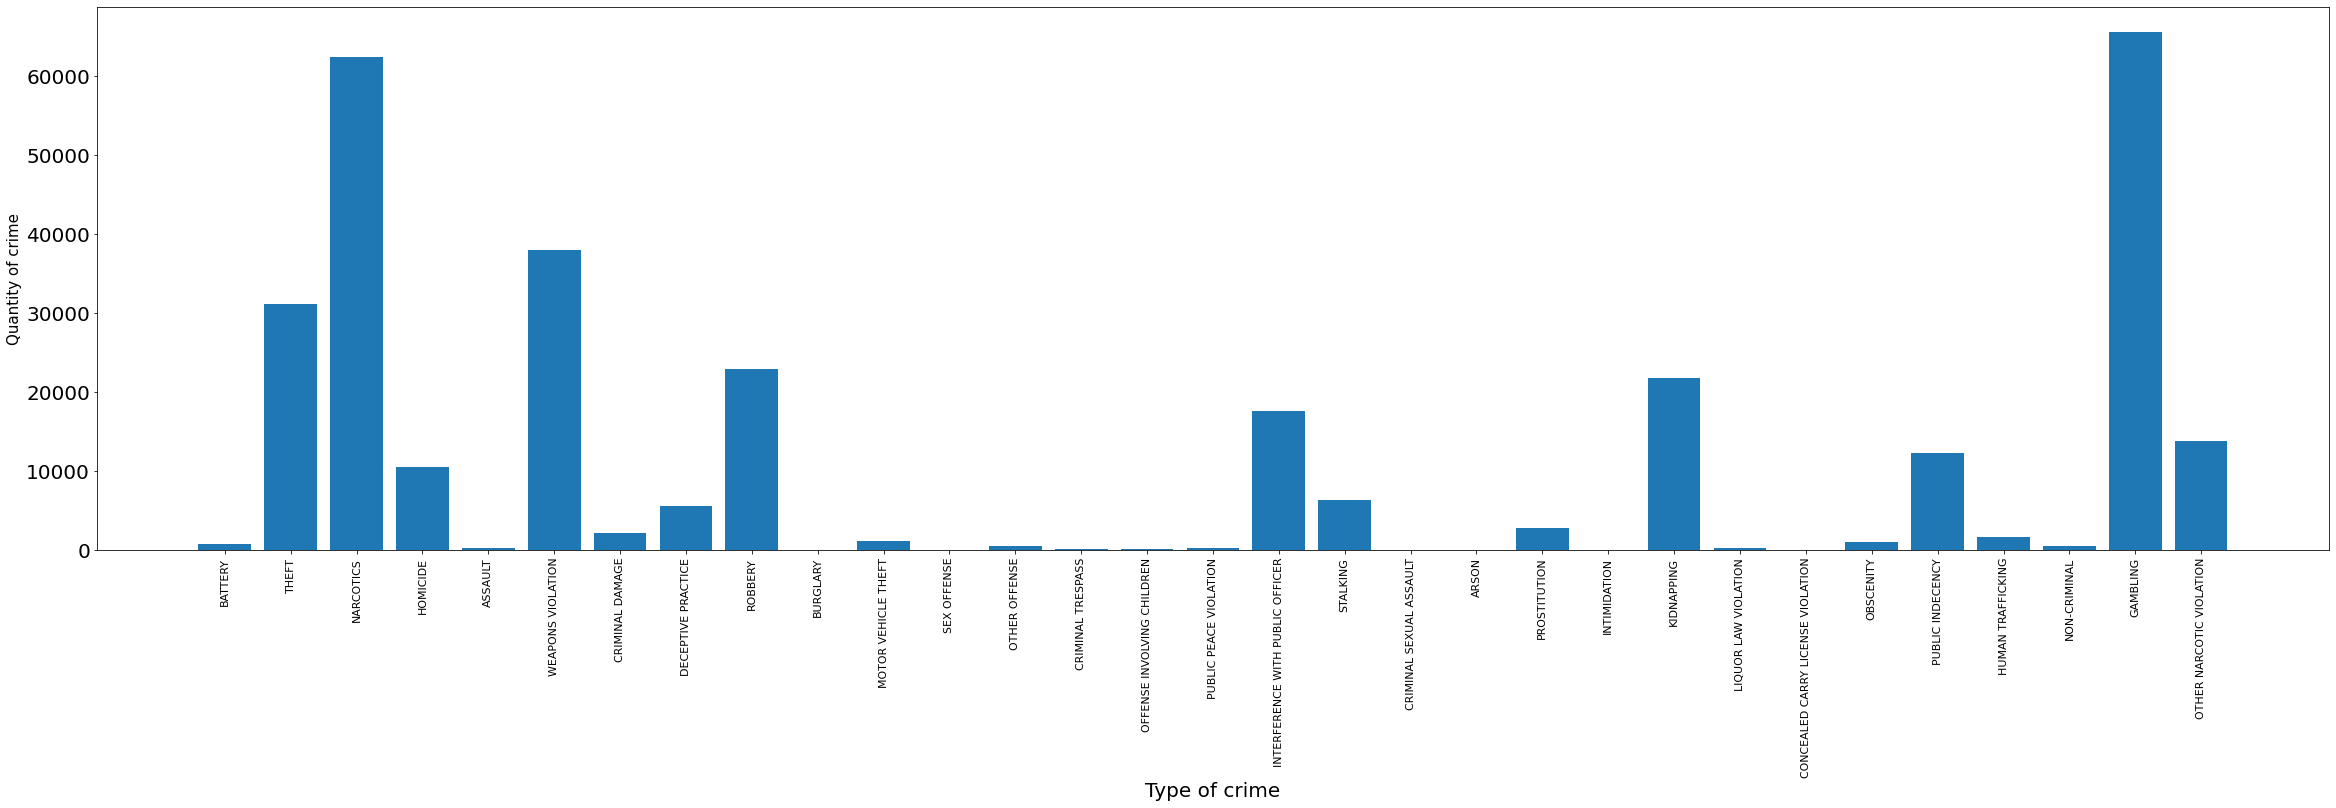

In [17]:
# Here our first visualtion of data: types of crime and quantity to see top-5 the most frequent crimes
# TOP-5: Narcrotics, Gambling, Weapons volation, Theft, Robbery

types = data['PrimaryType'].unique()

plt.bar(types,dataGroupedByType['ID'] )

plt.xticks(types,rotation='vertical',size=11)
plt.yticks(size=20)
plt.ylabel('Quantity of crime',size=15)
plt.xlabel('Type of crime',size=20)
plt.rcParams["figure.figsize"] = (40,10)

plt.show()

In [18]:
dataGroupedByLocation = data.groupby(['LocationDescription']).count()
dataGroupedByLocation['LocationDescription'] = dataGroupedByLocation.index
dataGroupedByLocation.head()


,ID,Date,PrimaryType,Arrest,Domestic,Beat,District,Year,Latitude,Longitude,Location,LocationDescription
LocationDescription,,,,,,,,,,,,
ABANDONED BUILDING,161,161,161,161,161,161,161,161,161,161,161,ABANDONED BUILDING
AIRCRAFT,64,64,64,64,64,64,64,64,64,64,64,AIRCRAFT
AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,114,114,114,114,114,114,114,114,114,114,114,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA
AIRPORT BUILDING NON-TERMINAL - SECURE AREA,73,73,73,73,73,73,73,73,73,73,73,AIRPORT BUILDING NON-TERMINAL - SECURE AREA
AIRPORT EXTERIOR - NON-SECURE AREA,103,103,103,103,103,103,103,103,103,103,103,AIRPORT EXTERIOR - NON-SECURE AREA


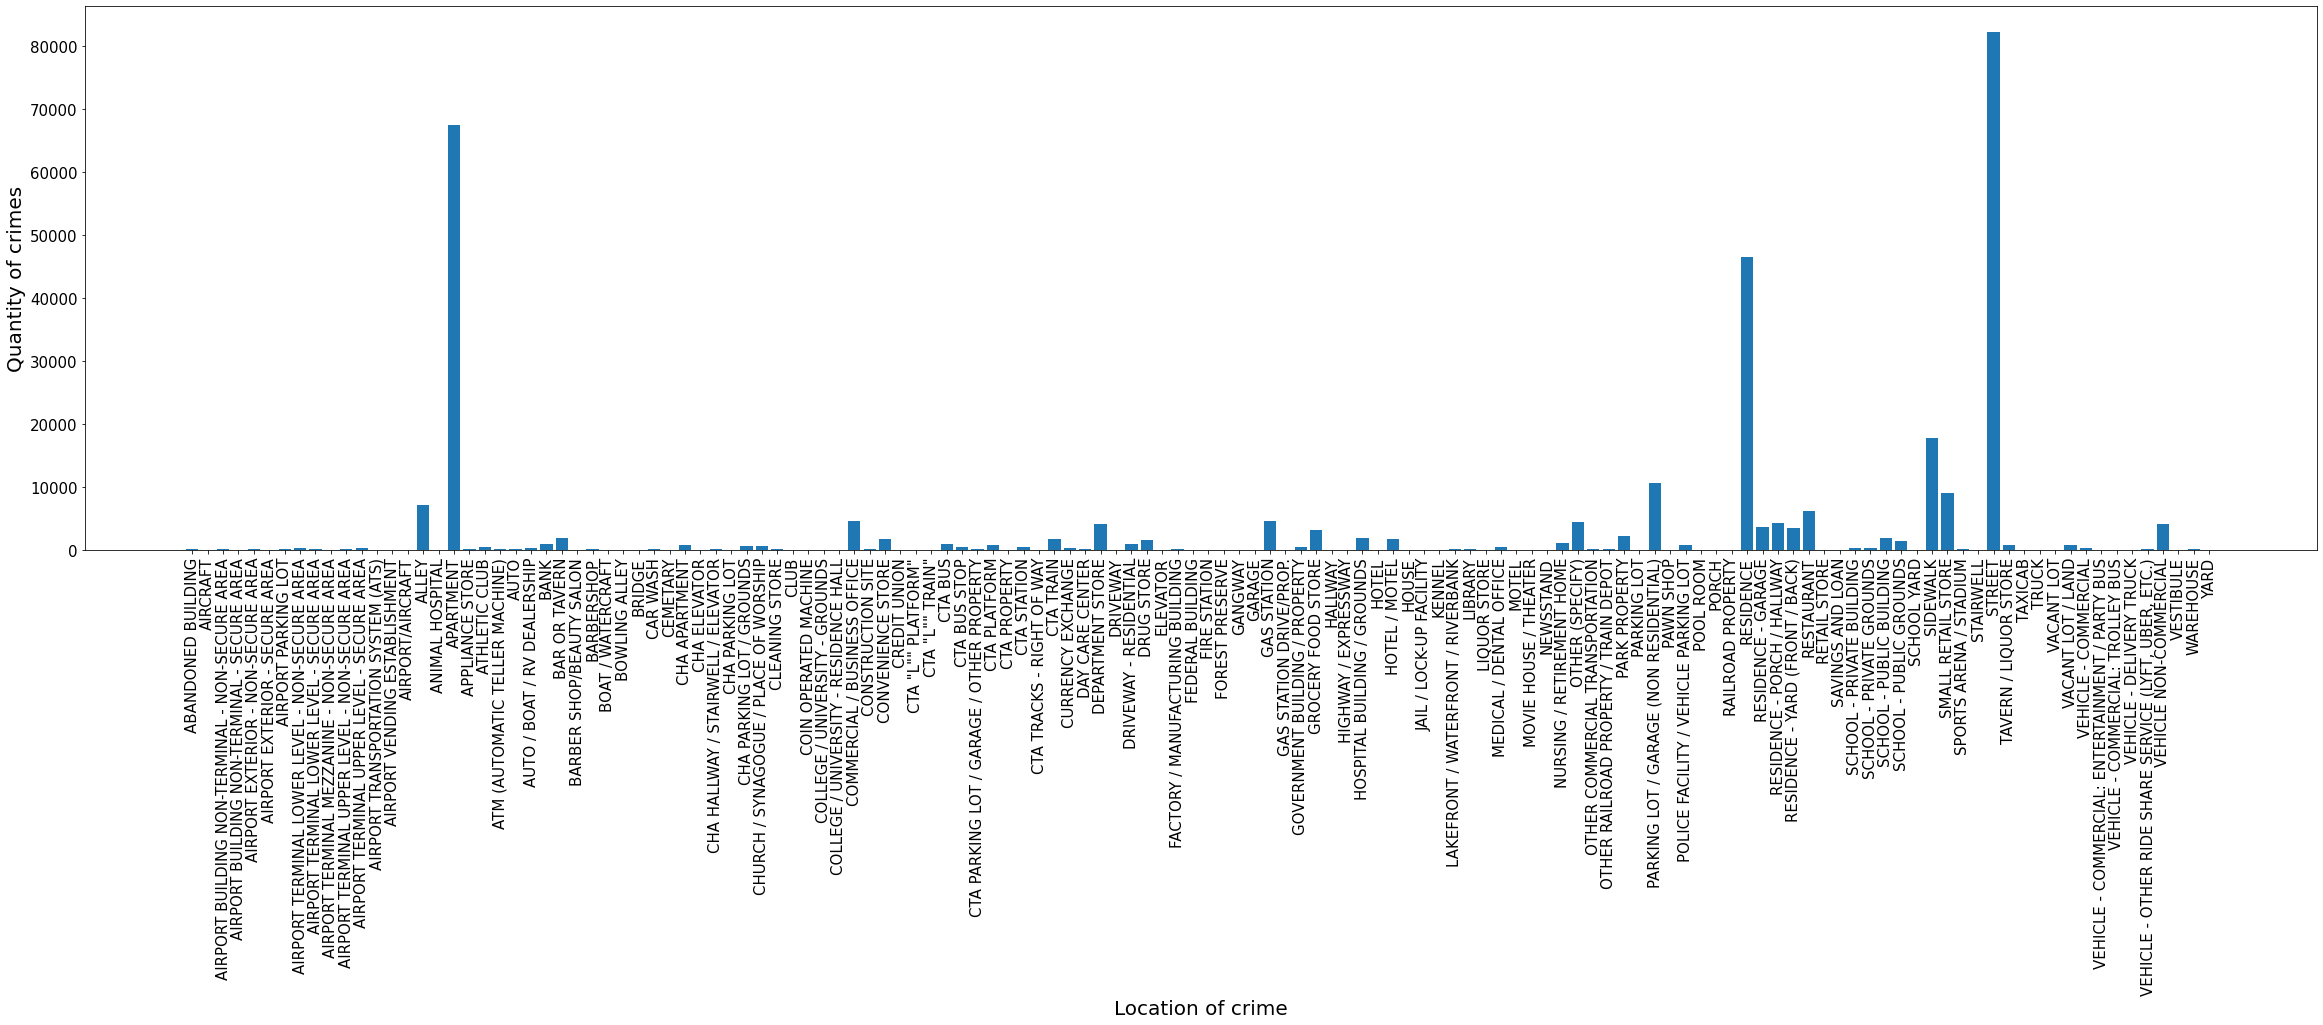

In [19]:
# Here of  visualtion of data: LOCATIONS of crime and quantity to see top-10 the most frequent crimes

description = data['LocationDescription'].unique()

data_sorted = dataGroupedByLocation.sort_values(by=['ID'], ascending=False)


description = description.astype('str')


plt.bar(dataGroupedByLocation['LocationDescription'],dataGroupedByLocation['ID'])

plt.xticks(dataGroupedByLocation['LocationDescription'],rotation='vertical',size=15)
plt.yticks(size=15)
plt.ylabel('Quantity of crimes',size=20)
plt.xlabel('Location of crime', size=20)
plt.rcParams["figure.figsize"] = (40,10)

In [20]:
# TOP-10 most popular location of crime

data_sorted.head(10)

,ID,Date,PrimaryType,Arrest,Domestic,Beat,District,Year,Latitude,Longitude,Location,LocationDescription
LocationDescription,,,,,,,,,,,,
STREET,82190,82190,82190,82190,82190,82190,82190,82190,82190,82190,82190,STREET
APARTMENT,67530,67530,67530,67530,67530,67530,67530,67530,67530,67530,67530,APARTMENT
RESIDENCE,46562,46562,46562,46562,46562,46562,46562,46562,46562,46562,46562,RESIDENCE
SIDEWALK,17721,17721,17721,17721,17721,17721,17721,17721,17721,17721,17721,SIDEWALK
PARKING LOT / GARAGE (NON RESIDENTIAL),10604,10604,10604,10604,10604,10604,10604,10604,10604,10604,10604,PARKING LOT / GARAGE (NON RESIDENTIAL)
SMALL RETAIL STORE,9040,9040,9040,9040,9040,9040,9040,9040,9040,9040,9040,SMALL RETAIL STORE
ALLEY,7137,7137,7137,7137,7137,7137,7137,7137,7137,7137,7137,ALLEY
RESTAURANT,6138,6138,6138,6138,6138,6138,6138,6138,6138,6138,6138,RESTAURANT
GAS STATION,4662,4662,4662,4662,4662,4662,4662,4662,4662,4662,4662,GAS STATION


In [21]:
data.columns

Index(['ID', 'Date', 'PrimaryType', 'LocationDescription', 'Arrest',
       'Domestic', 'Beat', 'District', 'Year', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [22]:
data['District'].unique()

array([ 7,  6, 15,  3,  4, 12, 24, 10, 14, 22, 18,  5, 11,  9,  2, 25,  8,
       17, 20, 16, 19,  1, 31])

In [23]:
data['Beat'].unique()

array([ 732,  623, 1513,  713,  332,  434, 1231, 2433,  424, 1032, 1412,
       1533, 2211,  413, 1824, 2222,  533, 1133,  935, 1232, 1113, 1532,
        224,  914,  221,  532, 1831,  432, 1112, 2534, 1215, 1021,  824,
       1022,  823,  931, 2533,  724, 1833, 1131,  323, 2423,  522,  631,
       1711, 2013, 2431,  711,  423, 1814, 2513,  832,  831,  421, 2413,
        523, 2011,  322, 1011,  215, 1624,  731, 2511,  815,  324, 1224,
        211,  913, 1832,  621,  733,  812,  715,  825,  622, 1531, 1024,
       1511,  414, 1922,  633,  932, 2515, 1634, 1124,  513, 1633, 1821,
       2524,  223, 1122, 1213, 1222, 1914, 1115,  411, 1135, 1034, 1913,
       2535,  133,  334, 2212,  624, 1934, 1431,  725,  321,  735, 1512,
       2412, 2234,  632, 1111, 1123, 1632, 1434, 1214,  524,  131,  822,
       1432, 2522, 2532,  634,  235,  114, 2531, 2424,  232,  614,  312,
        512, 1422, 1622, 1524,  313, 2233, 2221, 1235, 1012, 1925, 1134,
       1031,  924,  511, 1614, 1915,  612, 2512,  5

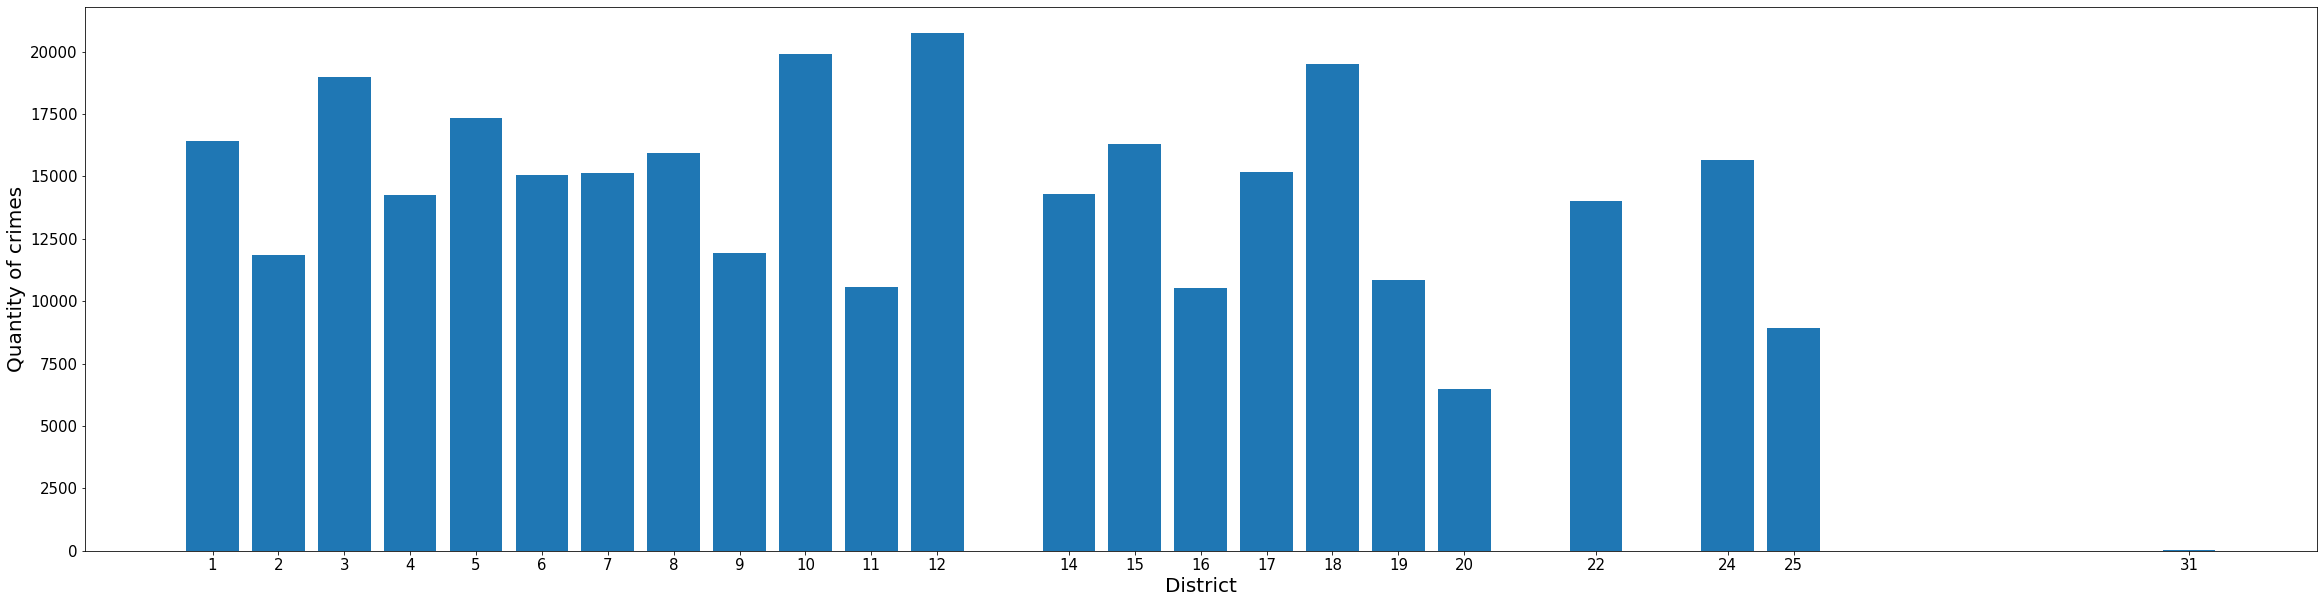

In [24]:
# plot a data group by districts to see whether we have some dependences

dataGroupedByDistrict = data.groupby(['District']).count()

plt.bar(data['District'].unique(),dataGroupedByDistrict['ID'])

plt.xticks(data['District'].unique(),size=15)
plt.yticks(size=15)
plt.xlabel('District',size=20)
plt.ylabel('Quantity of crimes',size=20)

plt.show()


# we have some more dangerous districts, but nothing extreme

In [25]:
# let's create a column month to discrover whether we have extereme months

data['Month'] = data['Date'].str.split('/',expand=True)[0]

In [26]:
data.head()

,ID,Date,PrimaryType,LocationDescription,Arrest,Domestic,Beat,District,Year,Latitude,Longitude,Location,Month
0,12260346,01/03/2021 01:23:00 PM,BATTERY,APARTMENT,False,True,732,7,2021,41.766435,-87.635964,"(41.766435144, -87.635963997)",01
1,12263464,01/03/2021 06:59:00 AM,THEFT,RESIDENCE,False,False,623,6,2021,41.748474,-87.630607,"(41.748473982, -87.630606588)",01
2,12259990,01/03/2021 12:20:00 AM,BATTERY,APARTMENT,False,True,1513,15,2021,41.882224,-87.766076,"(41.88222427, -87.766076162)",01
3,12260669,01/03/2021 08:47:00 PM,NARCOTICS,STREET,True,False,713,7,2021,41.790069,-87.654769,"(41.79006908, -87.654768679)",01
4,25702,01/03/2021 08:09:00 PM,HOMICIDE,STREET,False,False,332,3,2021,41.771062,-87.586271,"(41.771062488, -87.586270811)",01


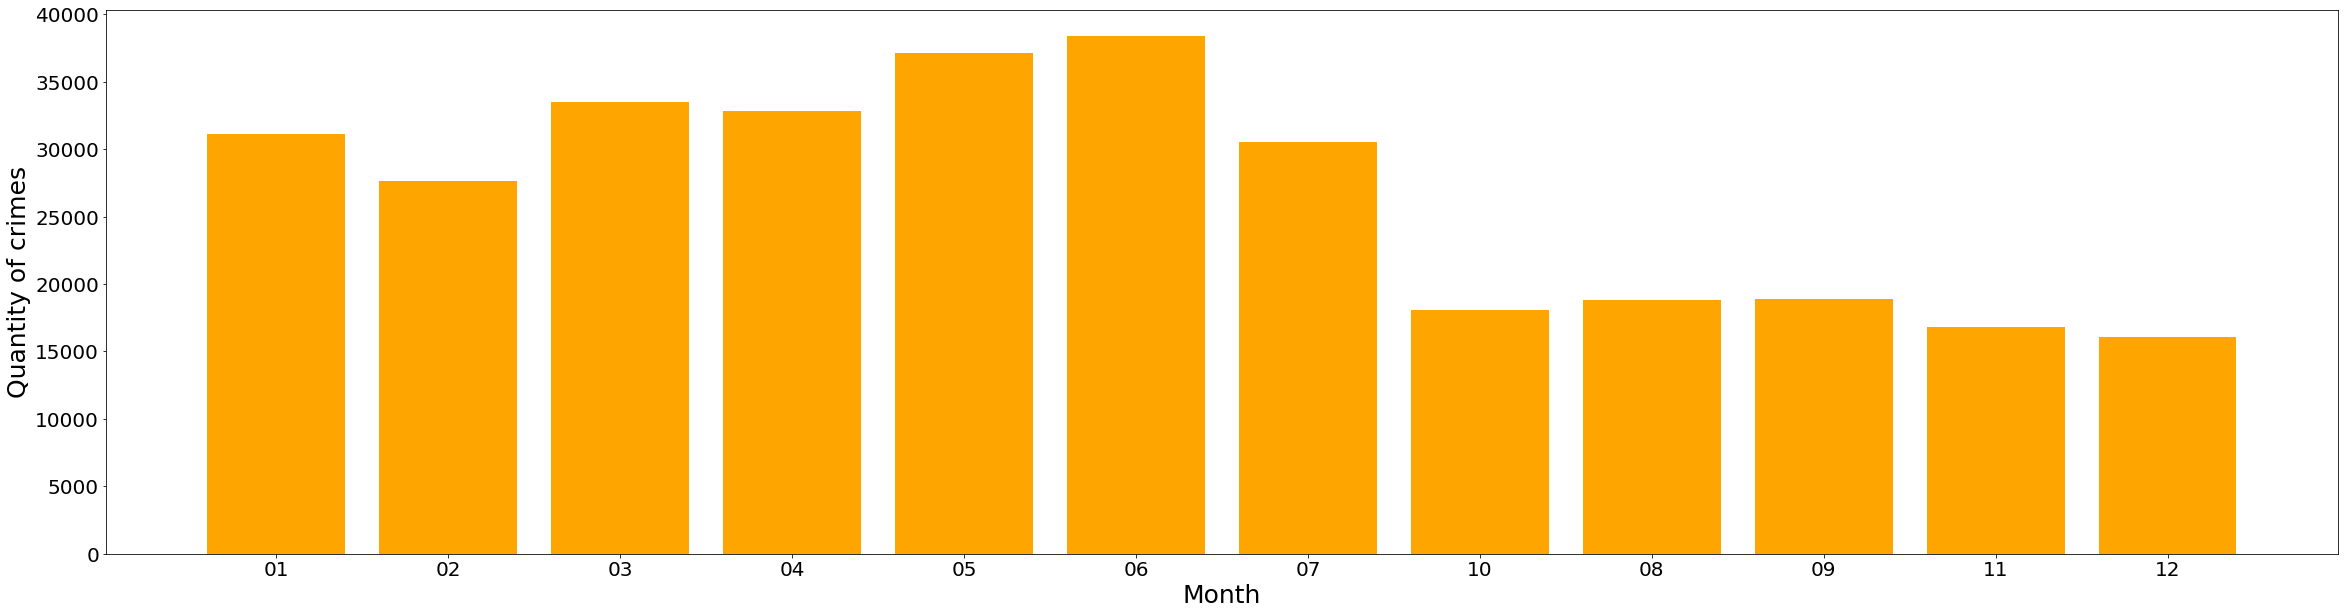

In [27]:
# plot a data group by month to see whether we have some dependences

dataGroupedByMonth = data.groupby(['Month']).count()

plt.bar(data['Month'].unique(),dataGroupedByMonth['ID'],color='orange')

plt.xticks(data['Month'].unique(),size=20)
plt.yticks(size=20)
plt.xlabel('Month',size=25)
plt.ylabel('Quantity of crimes',size=25)

plt.show()


# since firtst month to sevens month was happened more crimes than since seven month

In [28]:
data['Day'] = data['Date'].str.split('/',expand=True)[1]

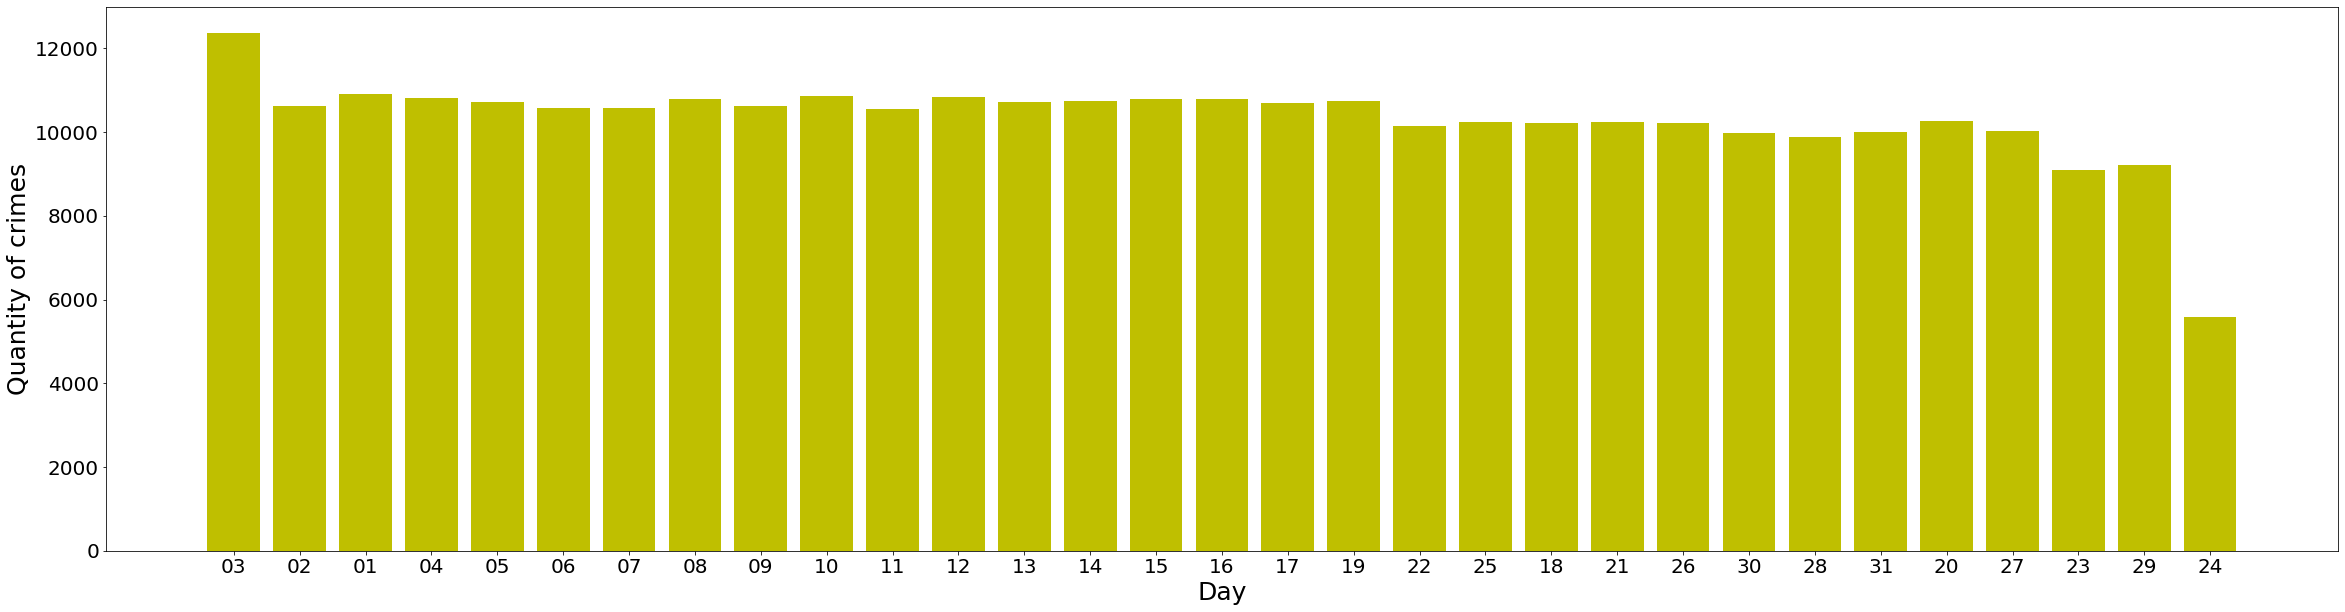

In [29]:
# plot a data group by month to see whether we have some dependences

dataGroupedByDay = data.groupby(['Day']).count()

plt.bar(data['Day'].unique(),dataGroupedByDay['ID'],color="y")

plt.xticks(data['Day'].unique(),size=20)
plt.yticks(size=20)
plt.xlabel('Day',size=25)
plt.ylabel('Quantity of crimes',size=25)

plt.show()


# conclussion - nothing special

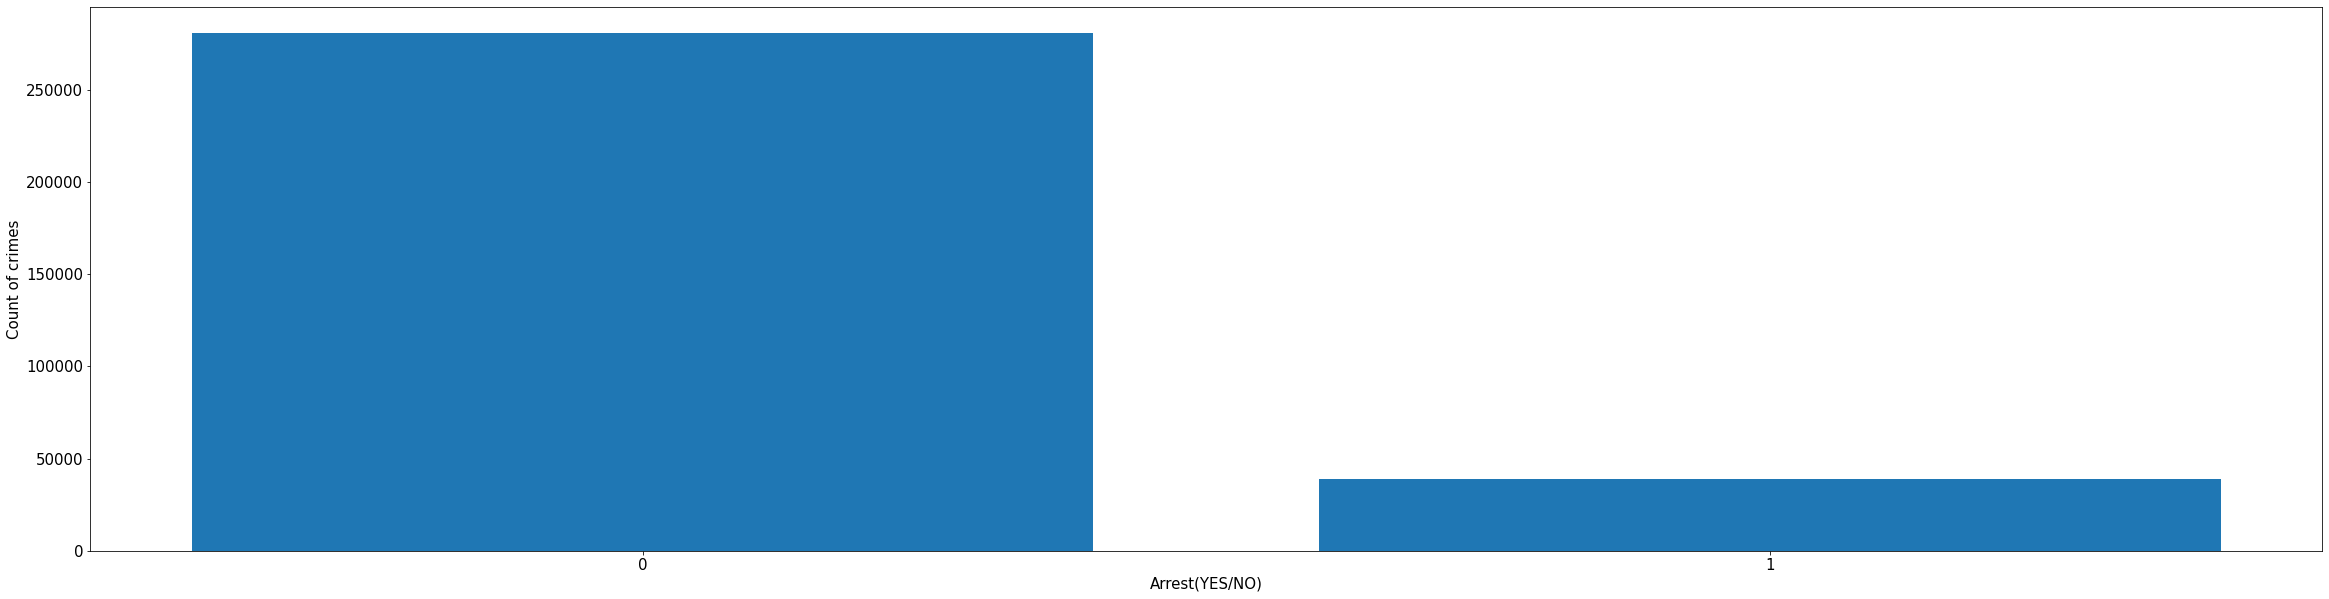

In [30]:
dataGroupedByArrest = data.groupby(['Arrest']).count()

plt.bar(data['Arrest'].unique(),dataGroupedByArrest['ID'])

plt.xticks(data['Arrest'].unique(),size=15)
plt.yticks(size=15)

plt.xlabel('Arrest(YES/NO)',size=15)
plt.ylabel('Count of crimes',size=15)

plt.rcParams["figure.figsize"] = (12,5)


plt.show()


# As we can see, insufficient arrests rather more than sufficient

In [17]:
#sns.barplot(data['Month'].unique(),dataGroupedByMonth['ID'],hue=dataGroupedByMonth['Arrest'].unique())

#plt.show()

In [18]:
#sns.set_theme(style="white", color_codes=True)

#sns.scatterplot(data['Latitude'],data['Longitude'],color='orange',sizes=(100, 120),alpha=.6)

#plt.show()

In [31]:
data.columns

Index(['ID', 'Date', 'PrimaryType', 'LocationDescription', 'Arrest',
       'Domestic', 'Beat', 'District', 'Year', 'Latitude', 'Longitude',
       'Location', 'Month', 'Day'],
      dtype='object')

In [32]:
dataGroupedByDistrict = data.groupby(['District']).count()
#dataGroupedByDistrict['District'] = dataGroupedByDistrict.index
dataGroupedByDistrict.head()

,ID,Date,PrimaryType,LocationDescription,Arrest,Domestic,Beat,Year,Latitude,Longitude,Location,Month,Day
District,,,,,,,,,,,,,
1,15156,15156,15156,15089,15156,15156,15156,15156,15156,15156,15156,15156,15156
2,15056,15056,15056,14999,15056,15056,15056,15056,15056,15056,15056,15056,15056
3,16309,16309,16309,16274,16309,16309,16309,16309,16309,16309,16309,16309,16309
4,18984,18984,18984,18957,18984,18984,18984,18984,18984,18984,18984,18984,18984
5,14254,14254,14254,14229,14254,14254,14254,14254,14254,14254,14254,14254,14254


/Users/nikita_voitishyn/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='District', ylabel='ID'>

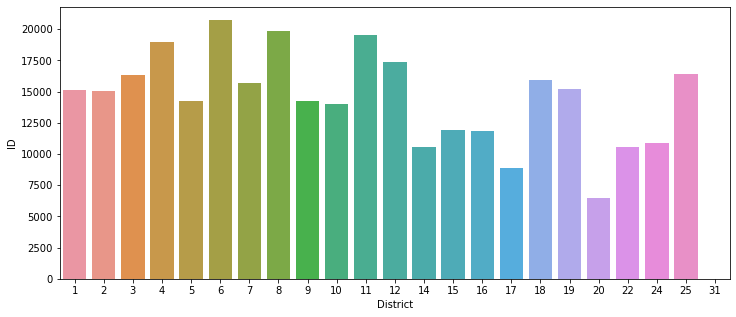

In [33]:
# Arrest by district
sns.barplot(dataGroupedByDistrict.index,dataGroupedByDistrict['ID'])

In [34]:
data['Arrest'].unique()

array([False,  True])

In [35]:
dataGroupedByDistrict = dataGroupedByDistrict[['ID']]
dataGroupedByDistrict = dataGroupedByDistrict.reset_index()
dataGroupedByDistrict.head()

,District,ID
0,1,15156
1,2,15056
2,3,16309
3,4,18984
4,5,14254


In [36]:
data['TrueArrest'] = np.where(data['Arrest'] == True, True,None)
data.head()

data['FalseArrest'] = np.where(data['Arrest'] == False, False,None)
data.head()


,ID,Date,PrimaryType,LocationDescription,Arrest,Domestic,Beat,District,Year,Latitude,Longitude,Location,Month,Day,TrueArrest,FalseArrest
0,12260346,01/03/2021 01:23:00 PM,BATTERY,APARTMENT,False,True,732,7,2021,41.766435,-87.635964,"(41.766435144, -87.635963997)",01,03,None,False
1,12263464,01/03/2021 06:59:00 AM,THEFT,RESIDENCE,False,False,623,6,2021,41.748474,-87.630607,"(41.748473982, -87.630606588)",01,03,None,False
2,12259990,01/03/2021 12:20:00 AM,BATTERY,APARTMENT,False,True,1513,15,2021,41.882224,-87.766076,"(41.88222427, -87.766076162)",01,03,None,False
3,12260669,01/03/2021 08:47:00 PM,NARCOTICS,STREET,True,False,713,7,2021,41.790069,-87.654769,"(41.79006908, -87.654768679)",01,03,True,None
4,25702,01/03/2021 08:09:00 PM,HOMICIDE,STREET,False,False,332,3,2021,41.771062,-87.586271,"(41.771062488, -87.586270811)",01,03,None,False


In [37]:
dataGroupedByDistrictArrest = data.groupby(['District'])['TrueArrest'].count()
dataGroupedByDistrictArrest

District
1     2024
2     1298
3     1642
4     1846
5     1877
6     2579
7     2102
8     1915
9     1625
10    2344
11    4666
12    1439
14    1199
15    1927
16    1497
17     834
18    1895
19    1214
20     571
22    1261
24    1044
25    2284
31       6
Name: TrueArrest, dtype: int64

In [38]:
dataGroupedByDistrictArrestFalse = data.groupby(['District'])['FalseArrest'].count()
dataGroupedByDistrictArrestFalse


District
1     13132
2     13758
3     14667
4     17138
5     12377
6     18164
7     13549
8     17973
9     12662
10    11672
11    14849
12    15904
14     9386
15    10011
16    10352
17     8078
18    14025
19    13963
20     5908
22     9270
24     9813
25    14125
31       14
Name: FalseArrest, dtype: int64

In [39]:
dataGroupedByDistrict['TrueArrest'] = dataGroupedByDistrictArrest
dataGroupedByDistrict['FalseArrest'] = dataGroupedByDistrictArrestFalse

dataGroupedByDistrict.rename(columns = {'index':'Distirct', 'ID':'CountOfCrimes'}, inplace = True)



dataGroupedByDistrictClear = dataGroupedByDistrict.dropna()

dataGroupedByDistrictClear = dataGroupedByDistrictClear.reset_index()

#dataGroupedByDistrictClear

dataGroupedByDistrictClear

,index,District,CountOfCrimes,TrueArrest,FalseArrest
0,1,2,15056,2024.0,13132.0
1,2,3,16309,1298.0,13758.0
2,3,4,18984,1642.0,14667.0
3,4,5,14254,1846.0,17138.0
4,5,6,20743,1877.0,12377.0
5,6,7,15651,2579.0,18164.0
6,7,8,19888,2102.0,13549.0
7,8,9,14287,1915.0,17973.0
8,9,10,14016,1625.0,12662.0
9,10,11,19515,2344.0,11672.0


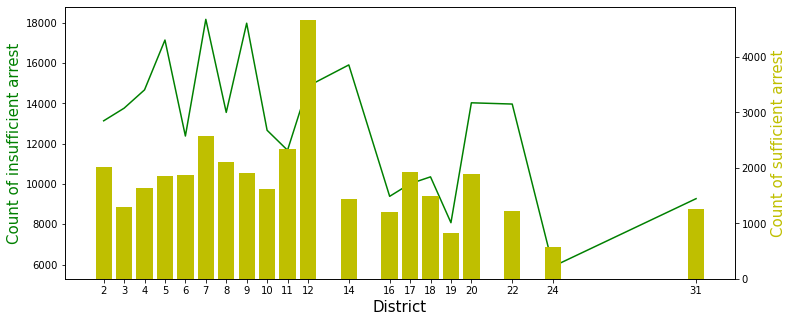

In [40]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax2.bar(dataGroupedByDistrictClear['District'],dataGroupedByDistrictClear['TrueArrest'],color='y')
ax1.plot(dataGroupedByDistrictClear['District'],dataGroupedByDistrictClear['FalseArrest'],color='g')     
        

ax2.set_xticks(dataGroupedByDistrictClear['District'])

        
ax1.set_xlabel('District',size=15)    
ax1.set_ylabel('Count of insufficient arrest',size=15,color='g')
ax2.set_ylabel('Count of sufficient arrest',size=15,color='y')
        
plt.show()


# so as we can see - insafficient arrest rather more than sufficient

In [41]:
dataGroupedByDistrict.head()

,District,CountOfCrimes,TrueArrest,FalseArrest
0,1,15156,NaN,NaN
1,2,15056,2024.0,13132.0
2,3,16309,1298.0,13758.0
3,4,18984,1642.0,14667.0
4,5,14254,1846.0,17138.0


In [42]:
dataGroupedByLocationArrestFalse = data.groupby(['LocationDescription'])['FalseArrest'].count()

dataGroupedByLocationtArrestTrue = data.groupby(['LocationDescription'])['TrueArrest'].count()

dataGroupedByLocation['TrueArrest'] = dataGroupedByLocationtArrestTrue
dataGroupedByLocation['FalseArrest'] = dataGroupedByLocationArrestFalse

print(np.where(dataGroupedByLocation.index == 'STREET'))

(array([117]),)


In [33]:
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#   print(dataGroupedByLocation)

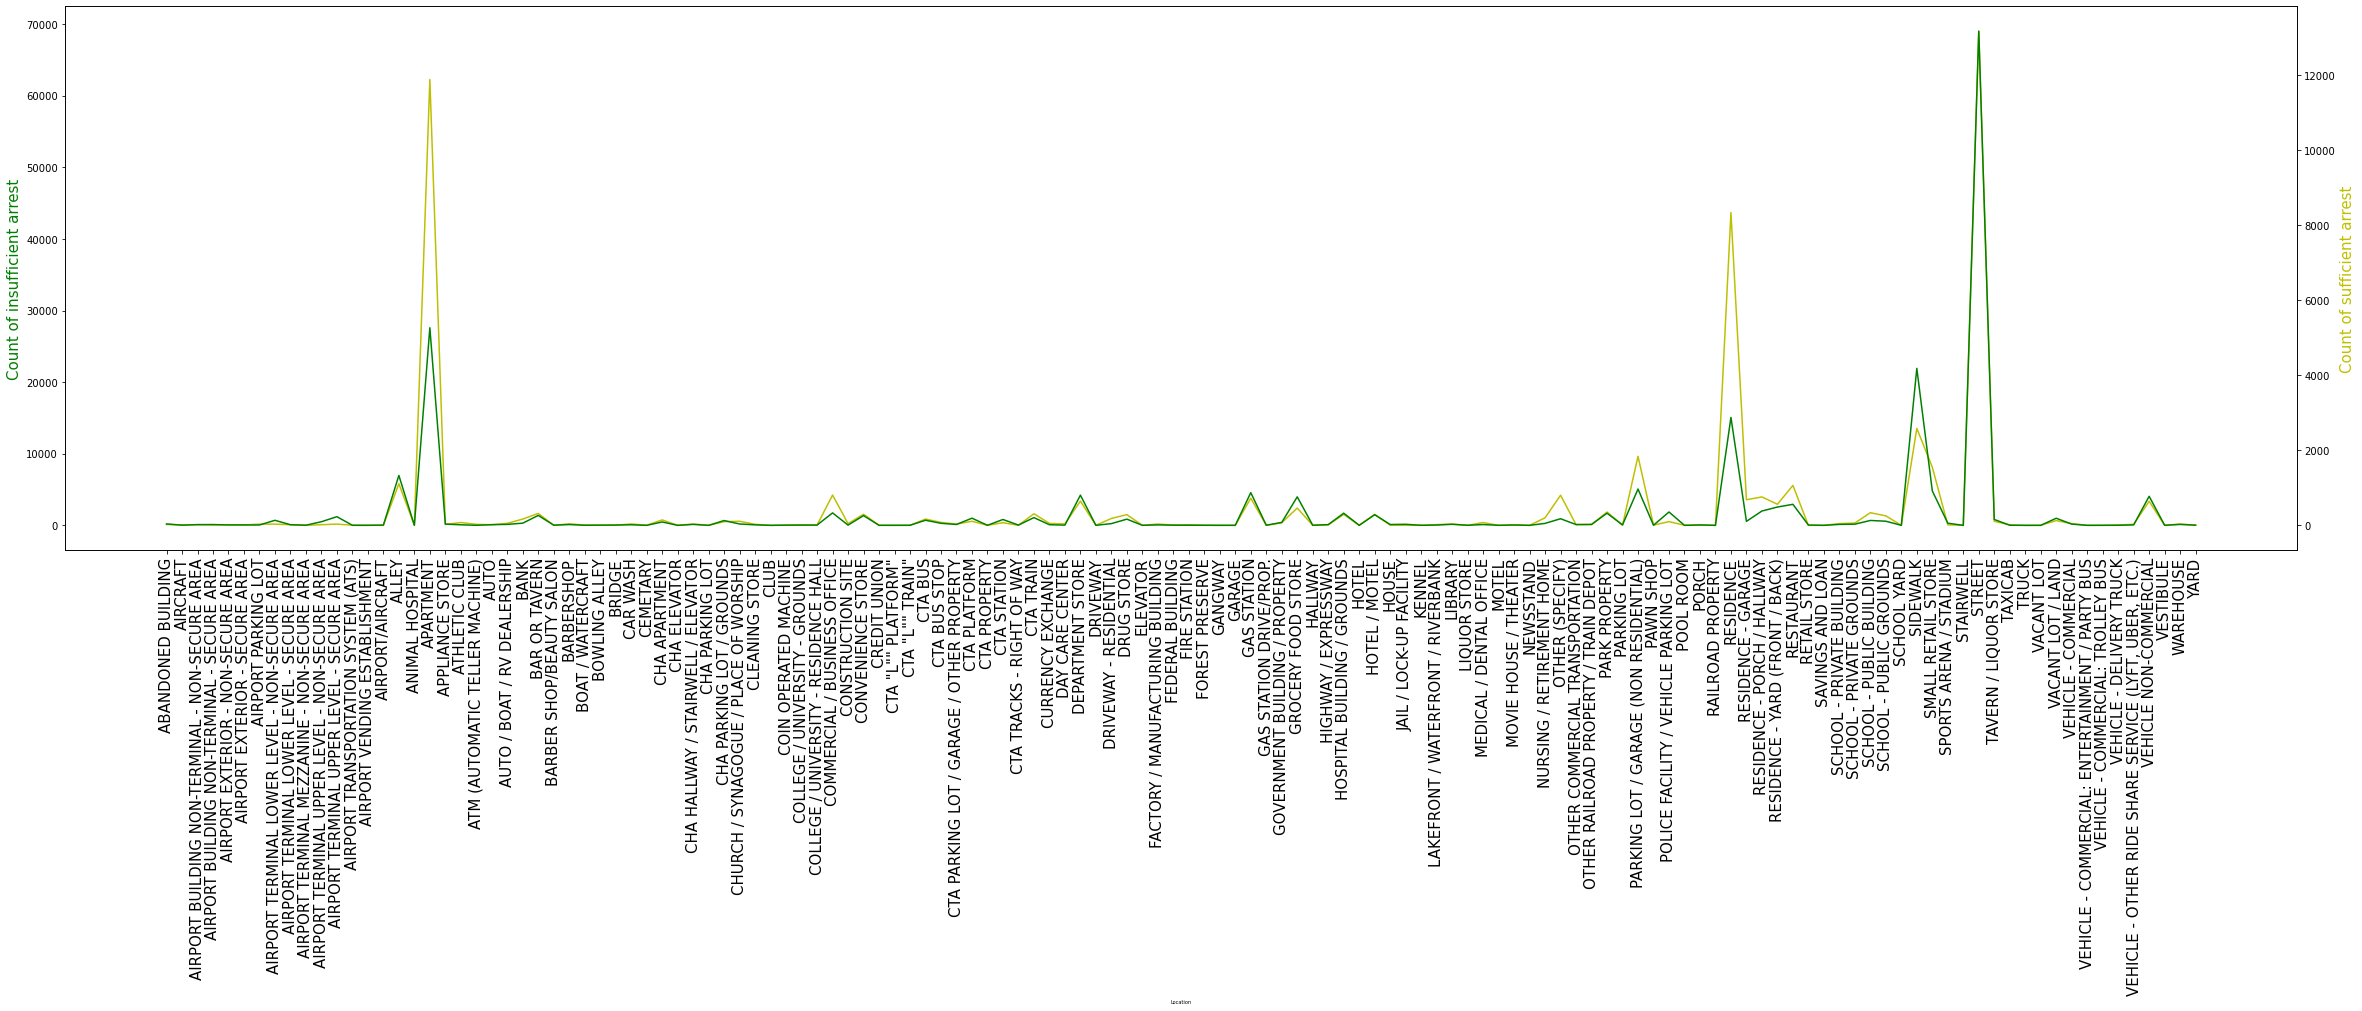

In [45]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax2.plot(dataGroupedByLocation.index,dataGroupedByLocation['TrueArrest'],color='g')
ax1.plot(dataGroupedByLocation.index,dataGroupedByLocation['FalseArrest'],color='y')     
        

ax1.set_xticks(dataGroupedByLocation.index)

ax1.set_xticklabels(dataGroupedByLocation.index, rotation='vertical',size=15)

        
ax1.set_xlabel('Location',size=5)    
ax1.set_ylabel('Count of insufficient arrest',size=15,color='g')
ax2.set_ylabel('Count of sufficient arrest',size=15,color='y')

plt.rcParams["figure.figsize"] = (40,10)
        
plt.show()


# so as we can see - insafficient arrest rather more than sufficient

In [46]:
data.columns

Index(['ID', 'Date', 'PrimaryType', 'LocationDescription', 'Arrest',
       'Domestic', 'Beat', 'District', 'Year', 'Latitude', 'Longitude',
       'Location', 'Month', 'Day', 'TrueArrest', 'FalseArrest'],
      dtype='object')

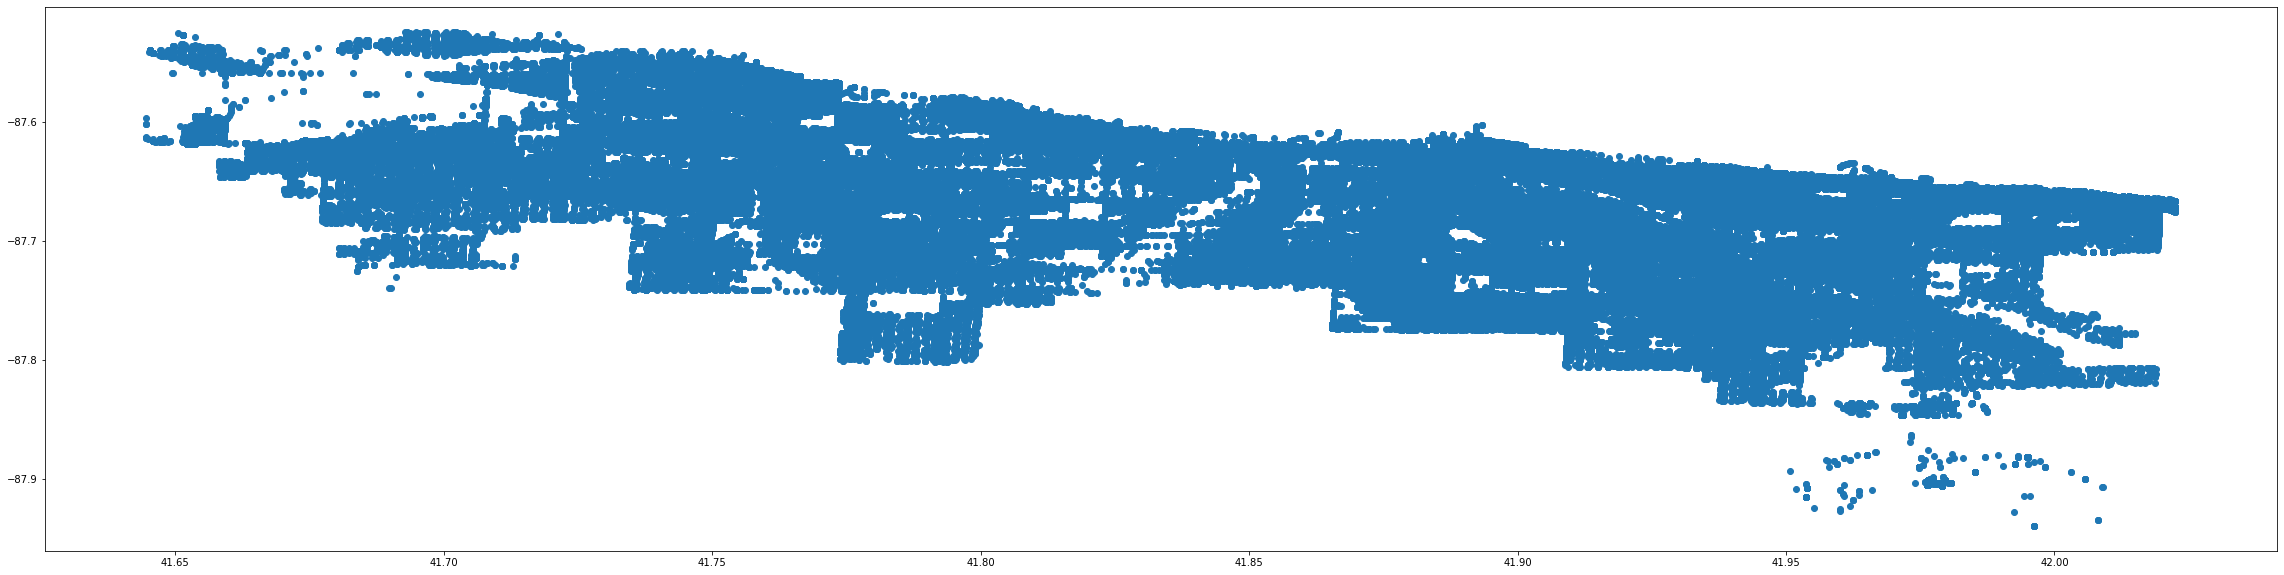

In [47]:
plt.scatter(data['Latitude'],data['Longitude'])



In [48]:
data.columns

Index(['ID', 'Date', 'PrimaryType', 'LocationDescription', 'Arrest',
       'Domestic', 'Beat', 'District', 'Year', 'Latitude', 'Longitude',
       'Location', 'Month', 'Day', 'TrueArrest', 'FalseArrest'],
      dtype='object')

Indicates the beat where the incident occurred. 
A beat is the smallest police geographic area – each beat has a dedicated police beat car. 
Three to five beats make up a police sector, and three sectors make up a police district.
The Chicago Police Department has 22 police districts. 
See the beats at https://data.cityofchicago.org/d/aerh-rz74.
    

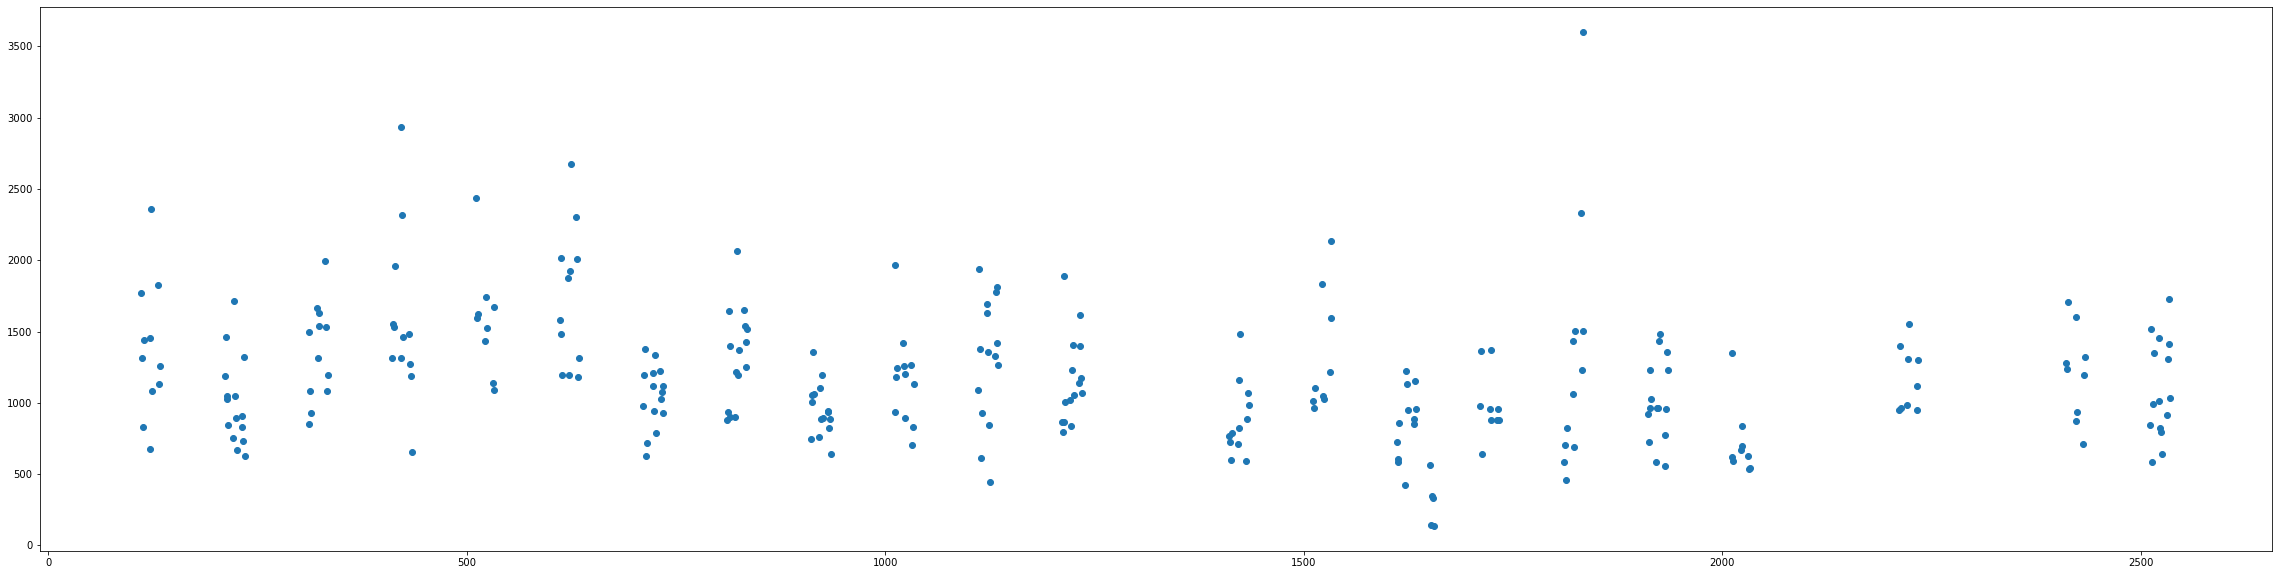

In [49]:
# try to understand whether we have some interesting pattetns with police beats

dataGroupedByBeat = data.groupby(['Beat']).count()


plt.scatter(dataGroupedByBeat.index,dataGroupedByBeat['ID'])


plt.show()

In [50]:
# TOP-12 most dengerous beats

dataGroupedByBeat['TrueArrest'] =  data.groupby(['Beat'])['TrueArrest'].count()

dataGroupedByBeat['FalseArrest'] =  data.groupby(['Beat'])['FalseArrest'].count()

dangerousBeats = dataGroupedByBeat[dataGroupedByBeat['ID']>2000][['ID','TrueArrest','FalseArrest']]

dangerousBeats = dangerousBeats.reset_index()

dangerousBeats.rename(columns={'ID':'CountOfCrimes'}, inplace = True)

dangerousBeats['PercentOfArrested'] = ((dangerousBeats['TrueArrest'] * 100)/dangerousBeats['CountOfCrimes']).round(decimals=2)

beatlist = list(dangerousBeats['Beat'])

data[data['Beat'].isin(beatlist)]

dangerousBeats['District'] = data['District']


dangerousBeats

# here we can see the most dangerous beats with some additional information for analysis

,Beat,CountOfCrimes,TrueArrest,FalseArrest,PercentOfArrested,District
0,123,2360,316,2044,13.39,7
1,421,2933,283,2650,9.65,6
2,423,2318,231,2087,9.97,15
3,511,2434,283,2151,11.63,7
4,612,2013,247,1766,12.27,3
5,624,2678,338,2340,12.62,4
6,631,2301,221,2080,9.60,12
7,632,2009,178,1831,8.86,3
8,823,2066,226,1840,10.94,24
9,1533,2132,406,1726,19.04,4


###  Random forrest classifier sklearn

In [51]:
dataTrueArrest = data
dataTrueArrest.shape
data.head()

,ID,Date,PrimaryType,LocationDescription,Arrest,Domestic,Beat,District,Year,Latitude,Longitude,Location,Month,Day,TrueArrest,FalseArrest
0,12260346,01/03/2021 01:23:00 PM,BATTERY,APARTMENT,False,True,732,7,2021,41.766435,-87.635964,"(41.766435144, -87.635963997)",01,03,None,False
1,12263464,01/03/2021 06:59:00 AM,THEFT,RESIDENCE,False,False,623,6,2021,41.748474,-87.630607,"(41.748473982, -87.630606588)",01,03,None,False
2,12259990,01/03/2021 12:20:00 AM,BATTERY,APARTMENT,False,True,1513,15,2021,41.882224,-87.766076,"(41.88222427, -87.766076162)",01,03,None,False
3,12260669,01/03/2021 08:47:00 PM,NARCOTICS,STREET,True,False,713,7,2021,41.790069,-87.654769,"(41.79006908, -87.654768679)",01,03,True,None
4,25702,01/03/2021 08:09:00 PM,HOMICIDE,STREET,False,False,332,3,2021,41.771062,-87.586271,"(41.771062488, -87.586270811)",01,03,None,False


In [52]:
dataFalseArrest = data[data['Arrest'] == False]
dataTrueArrest.shape

(319879, 16)

In [53]:
dataTrueArrest = dataTrueArrest.drop(['TrueArrest','FalseArrest'],axis=1)
dataTrueArrest.head()

,ID,Date,PrimaryType,LocationDescription,Arrest,Domestic,Beat,District,Year,Latitude,Longitude,Location,Month,Day
0,12260346,01/03/2021 01:23:00 PM,BATTERY,APARTMENT,False,True,732,7,2021,41.766435,-87.635964,"(41.766435144, -87.635963997)",01,03
1,12263464,01/03/2021 06:59:00 AM,THEFT,RESIDENCE,False,False,623,6,2021,41.748474,-87.630607,"(41.748473982, -87.630606588)",01,03
2,12259990,01/03/2021 12:20:00 AM,BATTERY,APARTMENT,False,True,1513,15,2021,41.882224,-87.766076,"(41.88222427, -87.766076162)",01,03
3,12260669,01/03/2021 08:47:00 PM,NARCOTICS,STREET,True,False,713,7,2021,41.790069,-87.654769,"(41.79006908, -87.654768679)",01,03
4,25702,01/03/2021 08:09:00 PM,HOMICIDE,STREET,False,False,332,3,2021,41.771062,-87.586271,"(41.771062488, -87.586270811)",01,03


In [54]:
dataTrueArrest = dataTrueArrest.drop(['ID','Year','Location'],axis=1)

In [55]:
dataTrueArrest.head()

,Date,PrimaryType,LocationDescription,Arrest,Domestic,Beat,District,Latitude,Longitude,Month,Day
0,01/03/2021 01:23:00 PM,BATTERY,APARTMENT,False,True,732,7,41.766435,-87.635964,01,03
1,01/03/2021 06:59:00 AM,THEFT,RESIDENCE,False,False,623,6,41.748474,-87.630607,01,03
2,01/03/2021 12:20:00 AM,BATTERY,APARTMENT,False,True,1513,15,41.882224,-87.766076,01,03
3,01/03/2021 08:47:00 PM,NARCOTICS,STREET,True,False,713,7,41.790069,-87.654769,01,03
4,01/03/2021 08:09:00 PM,HOMICIDE,STREET,False,False,332,3,41.771062,-87.586271,01,03


In [56]:
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(dataTrueArrest['PrimaryType'])
label1 = le.fit_transform(dataTrueArrest['LocationDescription'])
label2 = le.fit_transform(dataTrueArrest['Domestic'])
label3 = le.fit_transform(dataTrueArrest['Arrest'])


dataTrueArrest['PrimaryType'] = label
dataTrueArrest['LocationDescription'] = label1
dataTrueArrest['Domestic'] = label2
dataTrueArrest['Arrest'] = label3

dataTrueArrest['Month'] = data['Date'].str.split('/',expand=True)[0]
dataTrueArrest['Day'] = data['Date'].str.split('/',expand=True)[1]

dataTrueArrest.drop(['Date'],axis=1)



,PrimaryType,LocationDescription,Arrest,Domestic,Beat,District,Latitude,Longitude,Month,Day
0,2,17,0,1,732,7,41.766435,-87.635964,01,03
1,29,101,0,0,623,6,41.748474,-87.630607,01,03
2,2,17,0,1,1513,15,41.882224,-87.766076,01,03
3,17,117,1,0,713,7,41.790069,-87.654769,01,03
4,10,117,0,0,332,3,41.771062,-87.586271,01,03
...,...,...,...,...,...,...,...,...,...,...
319874,3,102,0,0,612,6,41.755241,-87.651438,07,16
319875,29,17,0,0,1622,16,41.983637,-87.768329,07,16
319876,16,117,0,0,632,6,41.735483,-87.620969,07,16
319877,22,101,0,0,523,5,41.659064,-87.632849,07,16


In [57]:
dataTrueArrest = dataTrueArrest.astype({"Day": int}, errors='raise') 
print(dataTrueArrest.dtypes)

Date                    object
PrimaryType              int64
LocationDescription      int64
Arrest                   int64
Domestic                 int64
Beat                     int64
District                 int64
Latitude               float64
Longitude              float64
Month                   object
Day                      int64
dtype: object


In [58]:
dataTrueArrest.head()

,Date,PrimaryType,LocationDescription,Arrest,Domestic,Beat,District,Latitude,Longitude,Month,Day
0,01/03/2021 01:23:00 PM,2,17,0,1,732,7,41.766435,-87.635964,01,3
1,01/03/2021 06:59:00 AM,29,101,0,0,623,6,41.748474,-87.630607,01,3
2,01/03/2021 12:20:00 AM,2,17,0,1,1513,15,41.882224,-87.766076,01,3
3,01/03/2021 08:47:00 PM,17,117,1,0,713,7,41.790069,-87.654769,01,3
4,01/03/2021 08:09:00 PM,10,117,0,0,332,3,41.771062,-87.586271,01,3


In [64]:
X = dataTrueArrest[['PrimaryType','Latitude','Longitude']]
Y = dataTrueArrest['Arrest']


clf = RandomForestClassifier()

clf.fit(X,Y)

RandomForestClassifier()

In [65]:
# importance of each variable
# choose the most valuable inputs to our target

print(clf.feature_importances_)

[0.349926   0.33564613 0.31442787]


In [66]:
X.shape

(319879, 3)

In [67]:
Y.shape

(319879,)

In [68]:
X

,PrimaryType,Latitude,Longitude
0,2,41.766435,-87.635964
1,29,41.748474,-87.630607
2,2,41.882224,-87.766076
3,17,41.790069,-87.654769
4,10,41.771062,-87.586271
...,...,...,...
319874,3,41.755241,-87.651438
319875,29,41.983637,-87.768329
319876,16,41.735483,-87.620969
319877,22,41.659064,-87.632849


In [70]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [71]:
X_train.shape, Y_train.shape

((255903, 3), (255903,))

In [72]:
X_test.shape, Y_test.shape

((63976, 3), (63976,))

In [73]:
clf.fit(X_train,Y_train)

RandomForestClassifier()

In [77]:
print(clf.predict(X_test))

[0 0 0 ... 0 0 0]


In [78]:
print(clf.score(X_test,Y_test))


# So, if we note the primary type of crime and location, we can predict with 90% probability whether this arrest will be successful

0.8987589095910966


In [84]:
X = dataTrueArrest[['Latitude','Longitude','Day','LocationDescription']]
Y = dataTrueArrest['Domestic']

clf = RandomForestClassifier()

clf.fit(X,Y)

RandomForestClassifier()

In [85]:
print(clf.feature_importances_)

[0.33726643 0.31383996 0.17427706 0.17461655]


In [86]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.4)
clf.fit(X_train,Y_train)

RandomForestClassifier()

In [88]:
print(clf.score(X_test,Y_test))


# So, if we note location,day and locationDescription we can predict with 78% probability whether crime will be domestic or no

0.7870138802050769


In [69]:
data.dtypes

ID                       int64
Date                    object
PrimaryType             object
LocationDescription     object
Arrest                    bool
Domestic                  bool
Beat                     int64
District                 int64
Year                     int64
Latitude               float64
Longitude              float64
Location                object
Day                     object
TrueArrest              object
FalseArrest             object
dtype: object

In [93]:
data.head()

,ID,Date,PrimaryType,LocationDescription,Arrest,Domestic,Beat,District,Year,Latitude,Longitude,Location,Month
0,12260346,01/03/2021 01:23:00 PM,BATTERY,APARTMENT,False,True,732,7,2021,41.766435,-87.635964,"(41.766435144, -87.635963997)",01
1,12263464,01/03/2021 06:59:00 AM,THEFT,RESIDENCE,False,False,623,6,2021,41.748474,-87.630607,"(41.748473982, -87.630606588)",01
2,12259990,01/03/2021 12:20:00 AM,BATTERY,APARTMENT,False,True,1513,15,2021,41.882224,-87.766076,"(41.88222427, -87.766076162)",01
3,12260669,01/03/2021 08:47:00 PM,NARCOTICS,STREET,True,False,713,7,2021,41.790069,-87.654769,"(41.79006908, -87.654768679)",01
4,25702,01/03/2021 08:09:00 PM,HOMICIDE,STREET,False,False,332,3,2021,41.771062,-87.586271,"(41.771062488, -87.586270811)",01


In [95]:
dataTrueArrest.head()

,Date,PrimaryType,LocationDescription,Arrest,Domestic,Beat,District,Latitude,Longitude,Month,Day
0,01/03/2021 01:23:00 PM,2,17,0,1,732,7,41.766435,-87.635964,01,3
1,01/03/2021 06:59:00 AM,29,101,0,0,623,6,41.748474,-87.630607,01,3
2,01/03/2021 12:20:00 AM,2,17,0,1,1513,15,41.882224,-87.766076,01,3
3,01/03/2021 08:47:00 PM,17,117,1,0,713,7,41.790069,-87.654769,01,3
4,01/03/2021 08:09:00 PM,10,117,0,0,332,3,41.771062,-87.586271,01,3


In [99]:
X = dataTrueArrest[['Month','Day','Latitude','Longitude','LocationDescription','Beat']]
Y = dataTrueArrest['PrimaryType']


clf = RandomForestClassifier()

clf.fit(X,Y)

RandomForestClassifier()

In [101]:
print(clf.feature_importances_)

[0.12553959 0.21549426 0.24765885 0.2429615  0.08885721 0.07948859]


In [104]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
clf.fit(X_train,Y_train)

RandomForestClassifier()

In [106]:
print(clf.score(X_test,Y_test))

# as we can see, performance of our model not soo good. We have two options: not enough data oder not suitable algoritm

0.2815274477929223


In [89]:
data = data.drop(['Day','TrueArrest','FalseArrest'],axis=1)

In [107]:
# unload the main dataframe to csv file for further work in Tableau and Power BI

In [119]:
#Preparing the model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


X = dataTrueArrest[['LocationDescription','District','Beat','Arrest','Latitude','Longitude']]
y = dataTrueArrest['PrimaryType']


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.40, random_state = 0)

model = LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_test,y_test))

# So now I can make an assumption that in your case the best choise is to predict only binomial values(0 or 1).
# Linear regression is not suitable, multiple classification also not suitable

/Users/nikita_voitishyn/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.22603788920845316
